In [8]:
%matplotlib widget

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

In [10]:
data = {} # data[L, c] contains (fail_rate, density)
for f in glob.glob('data/fail_noisy/fail_noisy_*_*.npy'):
    L = int(f.split("_")[3])
    c = int(f.split("_")[4].split(".")[0])
    data[L, c] = np.load(f)

data[120, 64] = np.array([np.NaN, np.NaN]) # missing data

In [11]:
plotting_array = np.zeros((6, 6, 2))
for L, c in data:
    plotting_array[L//20-1,int(np.log2(c))-1,:] = data[L, c]

In [12]:
fail_rate = plotting_array[:,:,0]
density = plotting_array[:,:,1]

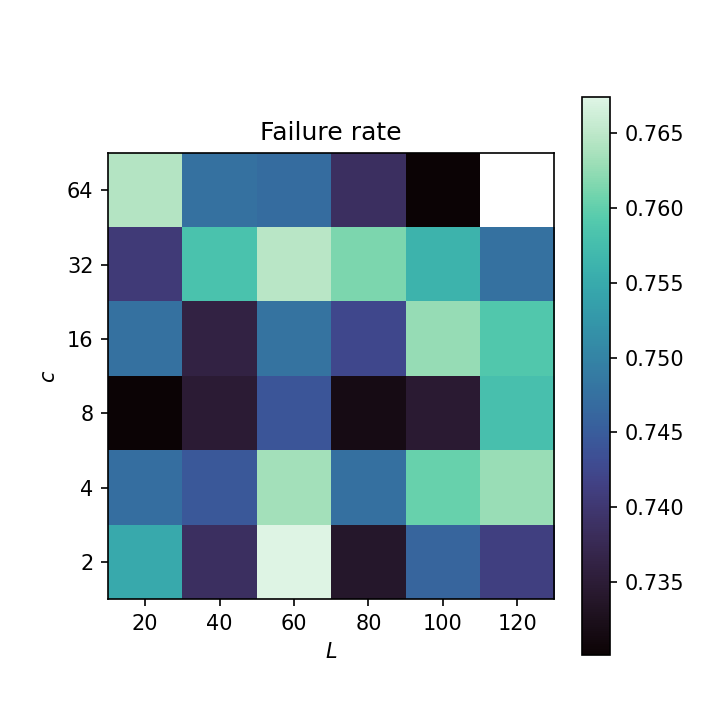

In [13]:
plt.matshow(fail_rate.T, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Failure rate")
plt.xlabel("$L$")
plt.ylabel("$c$")
plt.xticks(range(6), [20, 40, 60, 80, 100, 120])
plt.yticks(range(6), [2, 4, 8, 16, 32, 64])
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/fail_noisy.png")
plt.show()

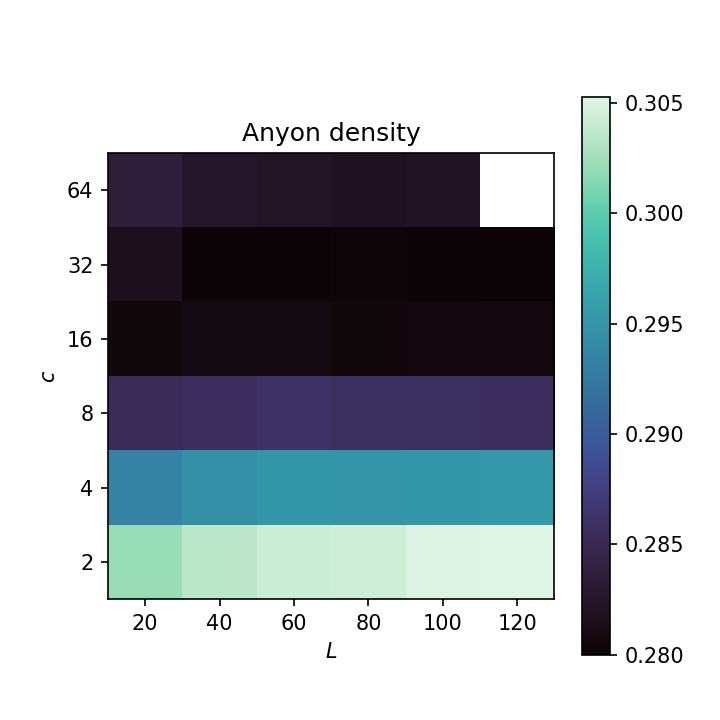

In [14]:
plt.matshow(density.T, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Anyon density")
plt.xlabel("$L$")
plt.ylabel("$c$")
plt.xticks(range(6), [20, 40, 60, 80, 100, 120])
plt.yticks(range(6), [2, 4, 8, 16, 32, 64])
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/density_noisy.png")
plt.show()